# I. Création du df Vélib 2018-2021

### I.1 Importation des compteurs Vélib / Fusion en un df / Observations

In [1]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
%cd ..
%cd Datas

C:\Users\Home\Documents\Git\ParisPyVelib\Datas


In [2]:
# Import all df 
df_New = pd.read_csv('New_comptage-velo-donnees-compteurs.csv', sep = ';')
df_2020 = pd.read_csv('2020_comptage-velo-donnees-compteurs.csv', sep = ';')
df_2019 = pd.read_csv('2019_comptage-velo-donnees-compteurs.csv', sep = ';')
df_2018 = pd.read_csv('2018_comptage-velo-donnees-compteurs.csv', sep = ';')

In [3]:
# Création de df_2021 pour supprimer les doublons entre df_New et df_2020

### Ajout d'une colonne à df_New pour identifier les années de comptages présents
df_New['Année de comptage'] = df_New['Date et heure de comptage'].apply(lambda x : x[0:4])
print('df_New', df_New['Année de comptage'].unique()) # Pour vérifier qu'il y ait seulement 2020 et 2021

### Création de df_2021 en supprimant les données 2020
df_2021 = df_New[df_New['Année de comptage'] == '2021']
print('df_2021', df_2021['Année de comptage'].unique()) # Pour vérifier qu'il ne reste seulement 2021

### Suppression de la colonne 'Année de comptage' pour garder les même colonnes que les autres df:
df_2021 = df_2021.drop('Année de comptage', axis = 1)

df_New ['2020' '2021']
df_2021 ['2021']


In [4]:
# Create df that combine all df (col 'source' ajoutée pour identifier la provenance de la data)
df = pd.concat([df_2021.assign(Source='2021'), df_2020.assign(Source='2020'), 
                df_2019.assign(Source='2019'), df_2018.assign(Source='2018')])

# Afficher len des dfs et vérifier que len de df = somme des len des df
pd.DataFrame([{'df_2021':len(df_2021), 'df_2020':len(df_2020), 'df_2019':len(df_2019),'df_2018':len(df_2018),'df': len(df),
               'df = sum des dfs': len(df) == len(df_2021) + len(df_2020)+ len(df_2019)+ len(df_2018)}], index = ['len']).head()

df_2021  df_2020  df_2019  df_2018       df  df = sum des dfs
len   344986   784339   436729   157825  1723879              True

- La longeur total est >2 millions de lignes, le df créé a bien pris en compte tous les df

In [5]:
# Création d'une police pour soigner l'affichage dans print
c = '\033[1m'+'\033[4m'+'\033[95m' # Bolt + Underline + Purple
e = '\033[0m' # End

# Affichage des infos des dfs
print(c+'df_2021 :'+e), print(df_2021.info()) 
print('\n'+c+'df_2020 :'+e), print(df_2020.info())
print('\n'+c+'df_2019 :'+e), print(df_2019.info())
print('\n'+c+'df_2018 :'+e), print(df_2018.info())
print('\n'+c+'df :'+e), print(df.info()) # Si je mets df.info dans un même print que le label, 
                                            # le label apparaît après au lieu de avant je comprends pas pourquoi...

df_2021 :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 344986 entries, 6561 to 947056
Data columns (total 9 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Identifiant du compteur                  344986 non-null  object 
 1   Nom du compteur                          344986 non-null  object 
 2   Identifiant du site de comptage          344986 non-null  int64  
 3   Nom du site de comptage                  344986 non-null  object 
 4   Comptage horaire                         344986 non-null  float64
 5   Date et heure de comptage                344986 non-null  object 
 6   Date d'installation du site de comptage  344986 non-null  object 
 7   Lien vers photo du site de comptage      344986 non-null  object 
 8   Coordonnées géographiques                344986 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 26.3+ MB
None

df_2020 :
<class 'pandas.co

(None, None)

**Observations:**
- Pas de NAN
- Pas le même nombre de données en fonction des années
    - pour 2021 c'est normal étant seulement sur 6 mois
    - Plus les années sont récentes, plus il y a de données (plus de compteurs ajoutés)
- Pas le même dtype en fonction des dfs pour 'Comptage horaire' (float64 ou int64)

In [6]:
# Nombre de modalités par colonne
print(c+'df_2021 :'+e, df_2021.nunique(), sep = '\n')
print(c,'df_2020 :'+e, df_2020.nunique(), sep = '\n')
print(c,'df_2019 :'+e, df_2019.nunique(), sep = '\n')
print(c,'df_2018 :'+e, df_2018.nunique(), sep = '\n')
print(c,'df :'+e, df.nunique(), sep = '\n')

df_2021 :
Identifiant du compteur                      97
Nom du compteur                              97
Identifiant du site de comptage              70
Nom du site de comptage                      70
Comptage horaire                            729
Date et heure de comptage                  3575
Date d'installation du site de comptage      36
Lien vers photo du site de comptage          70
Coordonnées géographiques                    70
dtype: int64

df_2020 :
Identifiant du compteur                      96
Nom du compteur                              96
Identifiant du site de comptage              69
Nom du site de comptage                      69
Comptage horaire                           1028
Date et heure de comptage                  8783
Date d'installation du site de comptage      35
Lien vers photo du site de comptage          69
Coordonnées géographiques                    69
dtype: int64

df_2019 :
Identifiant du compteur                      81
Nom du compteur               

**Observations:**
- Plusieurs colonnes ont le même nombre de modalités dans chaque df d'origine:
    - 'Identifiant du compteur'/ 'Nom du compteur'
    - 'Identifiant du site de comptage'/ 'Nom du site de comptage'/ 'Lien vers photo du site de comptage'/'Coordonnées géographiques' 
- Ces mêmes colonnes n'ont plus le même nombre de modalités dans le nouveau df créé --> Doublons dans certains cas ?


In [7]:
# Affichage des coordonnées uniques de df pour identifier d'éventuelles erreurs
df2 = df.sort_values(by = ['Coordonnées géographiques'], axis=0)
for i in df2['Coordonnées géographiques'].unique():
    print(i)

# Affichage des noms de compteurs uniques de df pour identifier d'éventuelles erreurs
df2 = df.sort_values(by = ['Nom du compteur'], axis=0)
for i in df2['Nom du compteur'].unique():
    print(i)

48.82024,2.35902
48.82026,2.3592
48.82108,2.32537
48.82203,2.32545
48.82636,2.30303
48.82648,2.303149
48.826503,2.38434
48.82658,2.38409
48.82682,2.38465
48.829523,2.38699
48.8295233,2.38699
48.8303305218,2.40055083752
48.830331,2.400551
48.830449,2.353199
48.83068,2.35348
48.830901,2.353237
48.83421,2.26542
48.83436,2.377
48.8344028,2.376941
48.834695,2.332968
48.83511,2.33338
48.835143,2.333031
48.83521,2.33307
48.83848,2.37587
48.83977,2.30198
48.839883,2.267099
48.83992,2.26694
48.839927,2.267151
48.84015,2.26733
48.840801,2.333233
48.84201,2.36729
48.842091,2.301
48.84216,2.30115
48.84223,2.36811
48.843435,2.383378
48.846028,2.375429
48.846099,2.375456
48.84638,2.31529
48.848399,2.275932
48.8484,2.27586
48.85013,2.35423
48.851131,2.345678
48.851525,2.343298
48.85204,2.28589
48.85209,2.28508
48.85372,2.35702
48.85735,2.35211
48.860528,2.388364
48.86057,2.38886
48.860622,2.388724
48.86077,2.372742
48.86077,2.37305
48.860852,2.372279
48.86149,2.37376
48.86155,2.37407
48.86179,2.32014

**Observations:**
- Coordonnées: les valeurs ne sont pas arrondis au même niveau ce qui crée des doublons
    - Pour la suite il faudra faire les mêmes arrondis
- Noms de compteurs: beaucoup de doublons à cause d'écritures différentes (majuscule, espace...)

**Next step:**
- Modifier 2 colonnes:
    - 'Nom du compteur' et 'Nom du site de comptage ' (pour tout mettre avec la même écriture et éviter les doublons)
- Créer 4 colonnes:
    - 'Direction' (indiquant le sens de circulation indiqué à la fin de 'Noms de compteurs')
    - 'Longitude' (avec arrondi)
    - 'Latitude' (avec arrondi)
    - 'Coord' (reprenant longitude et latitude = coordonnées arrondies)

### I.2 Modification des colonnes 'Nom du compteur' et 'Nom du site de comptage ' (pour éviter les doublons)

In [8]:
# Adresse en majuscule
df['Nom du compteur'] = df['Nom du compteur'].apply(lambda x : x.upper())
df['Nom du site de comptage'] = df['Nom du site de comptage'].apply(lambda x : x.upper())

# Remplacement de Boulevard par BD, Avenue par AV, HÔTEL par HOTEL
df['Nom du compteur'] = df['Nom du compteur'].apply(lambda x : ' '.join([item.replace('AVENUE','AV').replace('BOULEVARD','BD').replace('HÔTEL', 'HOTEL') for item in x.split()]))
df['Nom du site de comptage'] = df['Nom du site de comptage'].apply(lambda x : ' '.join([item.replace('AVENUE','AV').replace('BOULEVARD','BD').replace('HÔTEL', 'HOTEL') for item in x.split()]))

### I.3 Créations des colonnes 'Direction', 'Address', 'longitude', 'latitude' et 'Coord'

In [9]:
# Création de la col 'Direction' indiqué à la fin de 'Noms de compteurs'
df['Direction'] = df['Nom du compteur'].apply(lambda x : x.split(' ')[-1])
print(df['Direction'].value_counts()) # Vérification des modalités prises

NE-SO    273323
SO-NE    273201
SE-NO    265106
NO-SE    247445
E-O      186910
O-E      170132
S-N      160720
N-S      147042
Name: Direction, dtype: int64


In [10]:
# Création de la col 'Address' reprenant 'Nom de compteur' sans la direction à la fin
df['Nom du compteur'] = df['Nom du compteur'].replace('PONT DU GARIGLIANO SE-NO SE-NO', 'PONT DU GARIGLIANO SE-NO')
df['Address'] = df['Nom du compteur'].apply(lambda x : ' '.join([item for item in x.split()[0:-1]]))
list(df['Address'].unique())

['97 AV DENFERT ROCHEREAU',
 '105 RUE LA FAYETTE',
 '106 AV DENFERT ROCHEREAU',
 '100 RUE LA FAYETTE',
 '135 AV DAUMESNIL',
 '28 BD DIDEROT',
 '39 QUAI FRANÇOIS MAURIAC',
 "18 QUAI DE L'HOTEL DE VILLE",
 '27 BD DIDEROT',
 'VOIE GEORGES POMPIDOU',
 '67 BD VOLTAIRE',
 '10 AV DE LA GRANDE ARMÉE',
 '7 AV DE LA GRANDE ARMÉE',
 '72 BD VOLTAIRE',
 '89 BD DE MAGENTA',
 '16 AV DE LA PORTE DES TERNES',
 'PONT DU GARIGLIANO',
 '102 BD DE MAGENTA',
 '26 BD DE MÉNILMONTANT',
 'FACE AU 16 AV DE LA PORTE DES TERNES',
 '21 BD AUGUSTE BLANQUI',
 '72 BD RICHARD LENOIR',
 'PONT NATIONAL',
 'FACE AU 48 QUAI DE LA MARNE',
 '77 BD RICHARD LENOIR',
 "FACE 104 RUE D'AUBERVILLIERS",
 'FACE AU 70 QUAI DE BERCY',
 '6 RUE JULIA BARTET',
 "FACE AU 25 QUAI DE L'OISE",
 '35 BD DE MÉNILMONTANT',
 '152 BD DU MONTPARNASSE',
 '10 BD AUGUSTE BLANQUI',
 '243 BD SAINT GERMAIN',
 'TOTEM 64 RUE DE RIVOLI',
 '87 AV DE FLANDRE',
 '72 AV DE FLANDRE',
 '2 AV DE LA PORTE DE BAGNOLET',
 '44 AV DES CHAMPS ELYSÉES',
 "180 AV D'ITALI

In [11]:
# Création des colonnes 'longitude', et 'latitude'
df[['Latitude', 'Longitude']] = df['Coordonnées géographiques'].str.split(',', expand = True)

# Arrondis des coordonnées à 3 décimales
df['Latitude'] = df['Latitude'].astype('float64').round(3)
df['Longitude'] = df['Longitude'].astype('float64').round(3)

# Création de 'Coord'
df['Coord'] = df['Latitude'].astype('str') + ',' + df['Longitude'].astype('str')
df.nunique()

Identifiant du compteur                      102
Nom du compteur                              100
Identifiant du site de comptage               71
Nom du site de comptage                       76
Comptage horaire                            1054
Date et heure de comptage                  29830
Date d'installation du site de comptage       37
Lien vers photo du site de comptage           76
Coordonnées géographiques                     90
Source                                         4
Direction                                      8
Address                                       69
Latitude                                      37
Longitude                                     52
Coord                                         63
dtype: int64

**Note :**
- Pas facile de choisir le bon arrondis:
    - si arrondi >= 3, plusieurs coord correspondent à une même adresse
    - si arrondi < 3, plusieurs adresses associées aux mêmes coords
- Le meilleur compromis trouvé est d'arrondir à 3 décimales (on obtient alors 63 coordonnées pour x adresses, le nombre réel d'adresse étant <69 puisqu'il faut enlever les erreurs d'écritures restantes et les numéros de rue qui diffèrent avec la direction)
    - certains compteurs ont été remplacés avec le temps, dans ce cas les 2 compteurs = même Coord
    - certaines Coord englobent des compteurs N-S et S-N par exemple (pas génant pour la suite puisque identifié dans col Direction)

**Next Step:**
- Vérifier que chaque Coord correspond à une adresse unique (sans compter la direction)

In [12]:
# Identifier les coordonnées ayant les mêmes adresses:
df3 = df[['Coord', 'Address']].groupby(['Address','Coord']).count()
df3.head(60) # Pas possible tout observer d'un coup(73 lignes), il faut faire head(60) puis tail(13)
df3.tail(13)

Empty DataFrame
Columns: []
Index: [(PONT DE BERCY, 48.838,2.376), (PONT DE LA CONCORDE, 48.864,2.32), (PONT DES INVALIDES, 48.863,2.31), (PONT DES INVALIDES, 48.863,2.311), (PONT DU GARIGLIANO, 48.84,2.267), (PONT NATIONAL, 48.827,2.384), (PONT NATIONAL, 48.827,2.385), (QUAI D'ORSAY, 48.863,2.312), (TOTEM 64 RUE DE RIVOLI, 48.857,2.352), (TOTEM 73 BD DE SÉBASTOPOL, 48.864,2.351), (TOTEM 85 QUAI D'AUSTERLITZ, 48.842,2.367), (TOTEM COURS LA REINE, 48.865,2.314), (VOIE GEORGES POMPIDOU, 48.848,2.276)]

- 4 adresses possèdent 2 coordonnées différentes qu'il faut donc fusionner:
    - 3 AV DE LA PORTE D'ORLÉANS ('48.821,2.325':'48.822,2.325')
    - 36 QUAI DE GRENELLE ('48.852,2.285':'48.852,2.286')
    - PONT DES INVALIDES ('48.863,2.31':'48.863,2.311')
    - PONT NATIONAL ('48.827,2.384': '48.827,2.385')

In [13]:
# Fusion des 4 Coords (étant la même adresse)
df['Coord'] = df['Coord'].replace({'48.821,2.325':'48.822,2.325', '48.852,2.285':'48.852,2.286', 
                                   '48.863,2.31':'48.863,2.311','48.827,2.384': '48.827,2.385'})

# Identifier les adresses ayant les même coordonnées
df2 = df[['Coord', 'Address']].groupby(['Coord', 'Address']).count()
df2.head(59) # Pas possible tout observer d'un coup(69 lignes), il faut faire head(59) puis tail(10)
df2.tail(10)

Empty DataFrame
Columns: []
Index: [(48.885,2.327, 20 AV DE CLICHY), (48.889,2.375, 72 AV DE FLANDRE), (48.889,2.375, 72 AV FLANDRE), (48.889,2.375, 87 AV DE FLANDRE), (48.89,2.369, FACE 104 RUE D'AUBERVILLIERS), (48.891,2.385, FACE AU 25 QUAI DE L'OISE), (48.891,2.386, FACE AU 48 QUAI DE LA MARNE), (48.896,2.36, 72 RUE DE LA CHAPELLE), (48.897,2.345, 69 BD ORNANO), (48.897,2.346, 74 BD ORNANO)]

- Chaque coord correspond bien à une même localisation, seul le sens de circulation peut changer (ce qui explique un numéro de rue parfois différent)
- 9 coordonnées correspondent à la même adresse (numéro de rue différent avec la direction):
    - BD AUGUSTE BLANQUI '48.83,2.353':'48.831,2.353'
    - BD RICHARD LENOIR '48.861,2.372':'48.861,2.373'
    - BD VOLTAIRE '48.861,2.374':'48.862,2.374'
    - BD DE MENILMONTANT '48.861,2.388':'48.861,2.389'
    - AV DE LA PORTE DE BAGNOLET '48.865,2.409':'48.865,2.41'
    - RUE LA FAYETTE '48.877,2.35':'48.878,2.351'
    - BD DE MAGENTA '48.878,2.354':'48.878,2.355'
    - AV DE LA PORTE DES TERNES '48.882,2.281':'48.882,2.282'
    - BD ORNANO '48.897,2.345':'48.897,2.346'

In [14]:
# Fusion des 9 Coords (étant la même adresse)
df['Coord'] = df['Coord'].replace({'48.83,2.353':'48.831,2.353','48.861,2.372':'48.861,2.373','48.861,2.374': '48.862,2.374',
                                   '48.861,2.388': '48.861,2.389','48.865,2.409': '48.865,2.41', '48.877,2.35':'48.878,2.351',
                                  '48.878,2.354':'48.878,2.355','48.882,2.281':'48.882,2.282','48.897,2.345':'48.897,2.346'})

# Vérification finale que chaque coordonnée = une même adresse peut importe le sens
df2 = df[['Coord', 'Direction', 'Address']].groupby(['Coord', 'Direction', 'Address']).count()
df2.head(59) # Pas possible tout observer d'un coup(100 lignes), il faut faire head(59) puis tail(41)
df2.tail(41)

Empty DataFrame
Columns: []
Index: [(48.863,2.311, N-S, PONT DES INVALIDES), (48.863,2.311, S-N, PONT DES INVALIDES), (48.863,2.312, E-O, QUAI D'ORSAY), (48.863,2.312, O-E, QUAI D'ORSAY), (48.864,2.32, N-S, PONT DE LA CONCORDE), (48.864,2.32, S-N, PONT DE LA CONCORDE), (48.864,2.351, N-S, TOTEM 73 BD DE SÉBASTOPOL), (48.864,2.351, S-N, TOTEM 73 BD DE SÉBASTOPOL), (48.865,2.314, E-O, TOTEM COURS LA REINE), (48.865,2.314, O-E, TOTEM COURS LA REINE), (48.865,2.354, NE-SO, 38 RUE TURBIGO), (48.865,2.354, SO-NE, 38 RUE TURBIGO), (48.865,2.41, E-O, FACE AU 4 AV DE LA PORTE DE BAGNOLET), (48.865,2.41, O-E, 2 AV DE LA PORTE DE BAGNOLET), (48.865,2.41, O-E, FACE AU 4 AV DE LA PORTE DE BAGNOLET), (48.87,2.307, NO-SE, 33 AV DES CHAMPS ELYSÉES), (48.87,2.307, SE-NO, 44 AV DES CHAMPS ELYSÉES), (48.875,2.292, NO-SE, 7 AV DE LA GRANDE ARMÉE), (48.875,2.292, SE-NO, 10 AV DE LA GRANDE ARMÉE), (48.878,2.351, E-O, 105 RUE LA FAYETTE), (48.878,2.351, O-E, 100 RUE LA FAYETTE), (48.878,2.355, NO-SE, 89 BD DE MAGENTA), (48.878,2.355, SE-NO, 102 BD DE MAGENTA), (48.878,2.355, SE-NO, 102 BD MAGENTA), (48.882,2.282, E-O, 16 AV DE LA PORTE DES TERNES), (48.882,2.282, O-E, FACE AU 16 AV DE LA PORTE DES TERNES), (48.885,2.327, NO-SE, 20 AV DE CLICHY), (48.885,2.327, SE-NO, 20 AV DE CLICHY), (48.889,2.375, NE-SO, 87 AV DE FLANDRE), (48.889,2.375, SO-NE, 72 AV DE FLANDRE), (48.889,2.375, SO-NE, 72 AV FLANDRE), (48.89,2.369, N-S, FACE 104 RUE D'AUBERVILLIERS), (48.89,2.369, S-N, FACE 104 RUE D'AUBERVILLIERS), (48.891,2.385, NE-SO, FACE AU 25 QUAI DE L'OISE), (48.891,2.385, SO-NE, FACE AU 25 QUAI DE L'OISE), (48.891,2.386, NE-SO, FACE AU 48 QUAI DE LA MARNE), (48.891,2.386, SO-NE, FACE AU 48 QUAI DE LA MARNE), (48.896,2.36, N-S, 72 RUE DE LA CHAPELLE), (48.896,2.36, S-N, 72 RUE DE LA CHAPELLE), (48.897,2.346, N-S, 69 BD ORNANO), (48.897,2.346, S-N, 74 BD ORNANO)]

**Les coordonnées sont maintenant uniques**:
- Chaque coordonnées correspond bien à une adresse ayant pour la plupart 2 sens de circulation
- 5 coordonnées possèdent une seule direction de compteur:
    - 3 AV DE LA PORTE D'ORLÉANS '48.822,2.325'
    - 135 AV DAUMESNIL '48.843,2.383'
    - 30 RUE SAINT JACQUES '48.851,2.346'
    - 21 BD SAINT MICHEL '48.852,2.343'
    - 243 BD SAINT GERMAIN '48.862,2.32'

In [15]:
# Mise à jours des col 'latitude' et 'longitude'
df[['Latitude', 'Longitude']] = df['Coord'].str.split(',', expand = True)

# Affichage des coordonnées à 5 décimales (nécessaire pour la suite lors d'un affichage mapping)
df['Latitude'] = df['Latitude'].astype('float64').apply(lambda x: format(x,".5f"))
df['Longitude'] = df['Longitude'].astype('float64').apply(lambda x: format(x,".5f"))

# Mise à jours de la col 'Coord'
df['Coord'] = df['Latitude'].astype('str') + ',' + df['Longitude'].astype('str')

# Création d'une colonne 'Adress_full' qui reprend les coord avec les directions
df['Coord_full'] = df['Coord'] + '-' + df['Direction']

df.nunique() # On a maintenant 50 coordonnées correspondant toutes bien à des adresses différentes

Identifiant du compteur                      102
Nom du compteur                              100
Identifiant du site de comptage               71
Nom du site de comptage                       76
Comptage horaire                            1054
Date et heure de comptage                  29830
Date d'installation du site de comptage       37
Lien vers photo du site de comptage           76
Coordonnées géographiques                     90
Source                                         4
Direction                                      8
Address                                       69
Latitude                                      35
Longitude                                     43
Coord                                         50
Coord_full                                    95
dtype: int64

### I.4 Mise en forme des colonnes date en date-time et ajout de colonnes pour séparer année, mois...

In [16]:
# Mettre en forme date-time les col 'Date et heure de comptage' et 'Date d'installation du site de comptage'
df['Date et heure de comptage']= df['Date et heure de comptage'].str.split('+', expand= True)
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], format = '%Y-%m-%dT%H:%M:%S')
df['''Date d'installation du site de comptage'''] = pd.to_datetime(df['''Date d'installation du site de comptage'''], format = '%Y-%m-%d')

# Créer des col pour séparer date de comptage 
df['Y_Date_Count'] = df['Date et heure de comptage'].dt.year
df['M_Date_Count'] = df['Date et heure de comptage'].dt.month
df['D_Date_Count'] = df['Date et heure de comptage'].dt.day
df['Dweek_Date_Count'] = df['Date et heure de comptage'].dt.weekday # va de 0 lundi à 6 dimanche
df['H_Date_Count'] = df['Date et heure de comptage'].dt.hour

# Créer des col pour séparer date d'installation 
df['Y_Date_Instal'] = df['''Date d'installation du site de comptage'''].dt.year
df['M_Date_Instal'] = df['''Date d'installation du site de comptage'''].dt.month
df['D_Date_Instal'] = df['''Date d'installation du site de comptage'''].dt.day

### I.5 Mise en forme du df_vélib final

In [17]:
# Rennomer les col pour simplifier et supprimer les espaces
df = df.rename({'Identifiant du compteur': 'Id_old',
                'Nom du compteur': 'Address1_old',
                'Lien vers photo du site de comptage': 'Photo_old',
                'Coordonnées géographiques': 'Coord_old',
                'Identifiant du site de comptage': 'Id',
                'Nom du site de comptage':'Address2_old',
                'Comptage horaire':'Count_by_hour',
                'Date et heure de comptage':'Date', 
                '''Date d'installation du site de comptage''':'Date_instal'}, axis = 1)

# Trier le df par date de comptage
df = df.sort_values(by = 'Date')
df.index = range(len(df.index))

# Enregister et afficher le nouveau df_velib
df_velib = df
df_velib.head()

Id_old                       Address1_old         Id  \
0  100042374-110042374        VOIE GEORGES POMPIDOU NE-SO  100042374   
1  100042374-109042374        VOIE GEORGES POMPIDOU SO-NE  100042374   
2         100003098-SC     106 AV DENFERT ROCHEREAU NE-SO  100003098   
3         100003097-SC             105 RUE LA FAYETTE E-O  100003097   
4  100036719-103036719  18 QUAI DE L'HOTEL DE VILLE SE-NO  100036719   

                     Address2_old  Count_by_hour       Date Date_instal  \
0           VOIE GEORGES POMPIDOU            1.0 2018-01-01  2017-12-15   
1           VOIE GEORGES POMPIDOU            0.0 2018-01-01  2017-12-15   
2  106 AV DENFERT ROCHEREAU NE-SO            3.0 2018-01-01  2012-02-22   
3          105 RUE LA FAYETTE E-O            8.0 2018-01-01  2012-02-13   
4     18 QUAI DE L'HOTEL DE VILLE            3.0 2018-01-01  2017-07-12   

                                           Photo_old           Coord_old  \
0  https://www.eco-visio.net/Photos/100042374/151...  48.848399,2.275932   
1  https://www.eco-visio.net/Photos/100042374/151...  48.848399,2.275932   
2  https://www.eco-visio.net/Photos/100003098/133...  48.835143,2.333031   
3  https://www.eco-visio.net/Photos/100003097/157...  48.877667,2.350556   
4  https://www.eco-visio.net/Photos/100036719/149...    48.85372,2.35702   

  Source  ...             Coord              Coord_full Y_Date_Count  \
0   2018  ...  48.84800,2.27600  48.84800,2.27600-NE-SO         2018   
1   2018  ...  48.84800,2.27600  48.84800,2.27600-SO-NE         2018   
2   2018  ...  48.83500,2.33300  48.83500,2.33300-NE-SO         2018   
3   2018  ...  48.87800,2.35100    48.87800,2.35100-E-O         2018   
4   2018  ...  48.85400,2.35700  48.85400,2.35700-SE-NO         2018   

  M_Date_Count D_Date_Count Dweek_Date_Count  H_Date_Count  Y_Date_Instal  \
0            1            1                0             0           2017   
1            1            1                0             0           2017   
2            1            1                0             0           2012   
3            1            1                0             0           2012   
4            1            1                0             0           2017   

   M_Date_Instal  D_Date_Instal  
0             12             15  
1             12             15  
2              2             22  
3              2             13  
4              7             12  

[5 rows x 24 columns]

# II. Création du df météo 2018-2021 

### II.1 Importation des données météo et simplification du df

**Commentaires:**
- Le data-set est réccupéré sur le site: https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table/?sort=date
- Le data-set est sélectionné aux mêmes dates que le df compteur vélo (de 2018-01-01 à 2021-05-29)
- Les données météos proviennent de la ville d'Athis-Mons (91), seul compteur disponible en île-de-France

In [18]:
# Importation et affichage du df_vélib 
df = pd.read_csv('donnees-synop-essentielles-omm.csv', sep =';')
df.head()

ID OMM station                       Date  Pression au niveau mer  \
0            7149  2018-01-02T01:00:00+01:00                101370.0   
1            7149  2018-01-03T10:00:00+01:00                100540.0   
2            7149  2018-01-05T19:00:00+01:00                100220.0   
3            7149  2018-02-28T01:00:00+01:00                101720.0   
4            7149  2018-02-26T16:00:00+01:00                102350.0   

   Variation de pression en 3 heures  Type de tendance barométrique  \
0                              330.0                            1.0   
1                              530.0                            1.0   
2                              140.0                            3.0   
3                              -60.0                            8.0   
4                             -130.0                            6.0   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                          270.0                          4.3       279.95   
1                          270.0                          7.7       280.75   
2                          210.0                          1.5       280.85   
3                           70.0                          2.5       265.65   
4                           60.0                         10.0       272.65   

   Point de rosée  Humidité  ...   Latitude  communes (name) communes (code)  \
0          276.75      80.0  ...  48.716833       Athis-Mons           91027   
1          276.75      76.0  ...  48.716833       Athis-Mons           91027   
2          277.45      79.0  ...  48.716833       Athis-Mons           91027   
3          259.65      62.0  ...  48.716833       Athis-Mons           91027   
4          259.05      35.0  ...  48.716833       Athis-Mons           91027   

                EPCI (name)  EPCI (code)  department (name)  \
0  Métropole du Grand Paris    200054781            Essonne   
1  Métropole du Grand Paris    200054781            Essonne   
2  Métropole du Grand Paris    200054781            Essonne   
3  Métropole du Grand Paris    200054781            Essonne   
4  Métropole du Grand Paris    200054781            Essonne   

   department (code)  region (name)  region (code)  mois_de_l_annee  
0                 91  Île-de-France             11                1  
1                 91  Île-de-France             11                1  
2                 91  Île-de-France             11                1  
3                 91  Île-de-France             11                2  
4                 91  Île-de-France             11                2  

[5 rows x 82 columns]

In [19]:
# Affichages des infos du df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID OMM station                                             9944 non-null   int64  
 1   Date                                                       9944 non-null   object 
 2   Pression au niveau mer                                     9943 non-null   float64
 3   Variation de pression en 3 heures                          9943 non-null   float64
 4   Type de tendance barométrique                              9943 non-null   float64
 5   Direction du vent moyen 10 mn                              9943 non-null   float64
 6   Vitesse du vent moyen 10 mn                                9943 non-null   float64
 7   Température                                                9943 non-null   float64
 8   Point de

**Observations:**
- Beaucoup trop de colonnes sont présentes pour notre utilisation
- Certaines colonnes possèdent que des NANs

**Next Step:**
- Identifier les colonnes à conserver
- Convertir la col 'Date' en format datetime
- Enregistrer le df obtenu

In [20]:
# Réccupération des colonnes intéressantes pour la suite
df = df[['Température (°C)',         
'Précipitations dans les 3 dernières heures',
'Humidité',         
'Hauteur totale de la couche de neige, glace, autre au sol', 
'Vitesse du vent moyen 10 mn',
'communes (name)',
'Date']]

In [21]:
# Mise en forme date-time la col 'Date'
df['Date']= df['Date'].str.split('+', expand= True)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%dT%H:%M:%S')

### II.2 Mise en forme du df_méteo final

In [22]:
# Rennomer les col pour simplifier et trier par Date
df = df.rename({'Température (°C)': 'T°C',
                'Précipitations dans les 3 dernières heures': 'Precip_last3h',
                'Humidité': 'HR%',
                'Hauteur totale de la couche de neige, glace, autre au sol': 'High_ice',
                'Vitesse du vent moyen 10 mn': 'Wind_speed_mean10mn',
                'communes (name)': 'City_meteo'}, axis = 1)

# Trier le df par date
df = df.sort_values(by = 'Date')
df.index = range(len(df.index))
df.head()

# Enregister et afficher le nouveau df_meteo
df_meteo = df
df_meteo.head()

T°C  Precip_last3h   HR%  High_ice  Wind_speed_mean10mn  City_meteo  \
0  8.4            0.0  72.0       0.0                  7.0  Athis-Mons   
1  7.8            0.0  69.0       0.0                  6.8  Athis-Mons   
2  6.0            0.0  81.0       0.0                  5.4  Athis-Mons   
3  7.2           -0.1  81.0       0.0                  6.4  Athis-Mons   
4  8.1            7.5  92.0       0.0                  6.5  Athis-Mons   

                 Date  
0 2018-01-01 01:00:00  
1 2018-01-01 04:00:00  
2 2018-01-01 07:00:00  
3 2018-01-01 10:00:00  
4 2018-01-01 13:00:00

# III. Fusion des df_velib et df_meteo

In [23]:
# Merge df_velib et df_meteo
df = df_velib.merge(df_meteo, on = 'Date', how = 'left')

# Affichage des longueurs de chaque df:
print('len df_velib=', len(df_velib), 'len df_meteo=', len(df_meteo), 'len df=', len(df))

# Affichage des NANs du df obtenu:
print(df.isna().sum())

len df_velib= 1723879 len df_meteo= 9944 len df= 1723879
Id_old                       0
Address1_old                 0
Id                           0
Address2_old                 0
Count_by_hour                0
Date                         0
Date_instal                  0
Photo_old                    0
Coord_old                    0
Source                       0
Direction                    0
Address                      0
Latitude                     0
Longitude                    0
Coord                        0
Coord_full                   0
Y_Date_Count                 0
M_Date_Count                 0
D_Date_Count                 0
Dweek_Date_Count             0
H_Date_Count                 0
Y_Date_Instal                0
M_Date_Instal                0
D_Date_Instal                0
T°C                    1150176
Precip_last3h          1151470
HR%                    1150176
High_ice               1164409
Wind_speed_mean10mn    1150176
City_meteo             1150090
dtype: int64


**Observation:**
- La fusion a bien été réalisée, par contre il y a des NANs à cause du comptage météo toutes les 3 heures, il faudra trouver un moyen de remplacer ces NANs ou de faire une modélisation en utilisant un comptage toutes les 3 heures
- Certaines colonnes peuvent être créées (un nouvel Id plus parlant, une date sans l'heure)
- D'autres colonnes peuvent être supprimées

In [24]:
# Modification de l'Id en reprenant les adresses uniques (50 Coord + 8 Directions)
df['Coord2'] = df['Coord']
df['Direction2'] = df['Direction']
df['Coord2'] = df['Coord2'].replace(to_replace=list(df['Coord2'].unique()),value = list(range(1,51)))
df['Direction2'] = df['Direction2'].replace(to_replace=list(df['Direction2'].unique()),value = [p/10 for p in range(1, 9)])
df['Id2_old'] = df['Id']
df['Id'] = df['Coord2'] + df['Direction2']

# Création d'une col 'Datetime' qui sauvegarde 'Date', puis moficication de 'Date' en supprimant l'heure
df['Date'] = pd.to_datetime(df['Date'])
df['Datetime'] = df['Date']
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Suppression des colonnes non utiles pour la suite:
df = df.drop(['Coord2','Direction2', 'Coord_full', 'Id_old','Id2_old','Address1_old','Address2_old','Photo_old', 'Coord_old'], axis = 1)

# Affichage du df obtenu
df.head()

Id  Count_by_hour        Date Date_instal Source Direction  \
0  1.1            1.0  2018-01-01  2017-12-15   2018     NE-SO   
1  1.2            0.0  2018-01-01  2017-12-15   2018     SO-NE   
2  2.1            3.0  2018-01-01  2012-02-22   2018     NE-SO   
3  3.3            8.0  2018-01-01  2012-02-13   2018       E-O   
4  4.4            3.0  2018-01-01  2017-07-12   2018     SE-NO   

                       Address  Latitude Longitude             Coord  ...  \
0        VOIE GEORGES POMPIDOU  48.84800   2.27600  48.84800,2.27600  ...   
1        VOIE GEORGES POMPIDOU  48.84800   2.27600  48.84800,2.27600  ...   
2     106 AV DENFERT ROCHEREAU  48.83500   2.33300  48.83500,2.33300  ...   
3           105 RUE LA FAYETTE  48.87800   2.35100  48.87800,2.35100  ...   
4  18 QUAI DE L'HOTEL DE VILLE  48.85400   2.35700  48.85400,2.35700  ...   

   Y_Date_Instal  M_Date_Instal  D_Date_Instal  T°C  Precip_last3h  HR%  \
0           2017             12             15  NaN            NaN  NaN   
1           2017             12             15  NaN            NaN  NaN   
2           2012              2             22  NaN            NaN  NaN   
3           2012              2             13  NaN            NaN  NaN   
4           2017              7             12  NaN            NaN  NaN   

   High_ice  Wind_speed_mean10mn  City_meteo   Datetime  
0       NaN                  NaN         NaN 2018-01-01  
1       NaN                  NaN         NaN 2018-01-01  
2       NaN                  NaN         NaN 2018-01-01  
3       NaN                  NaN         NaN 2018-01-01  
4       NaN                  NaN         NaN 2018-01-01  

[5 rows x 25 columns]

**Commentaires:**
- l'ID créé fait référence aux 50 adresses (unité 1 à 50)
- Les décimales correspondent à un sens de circulation
    - 0.1 = 'NE-SO', 0.2 ='SO-NE', 0.3='E-O', 0.4='SE-NO', 0.5='O-E', 0.6='NO-SE', 0.7='N-S', 0.8='S-N'

# III. Boxplot

### III.1 Visualisation des Boxplots pur chaque colonne

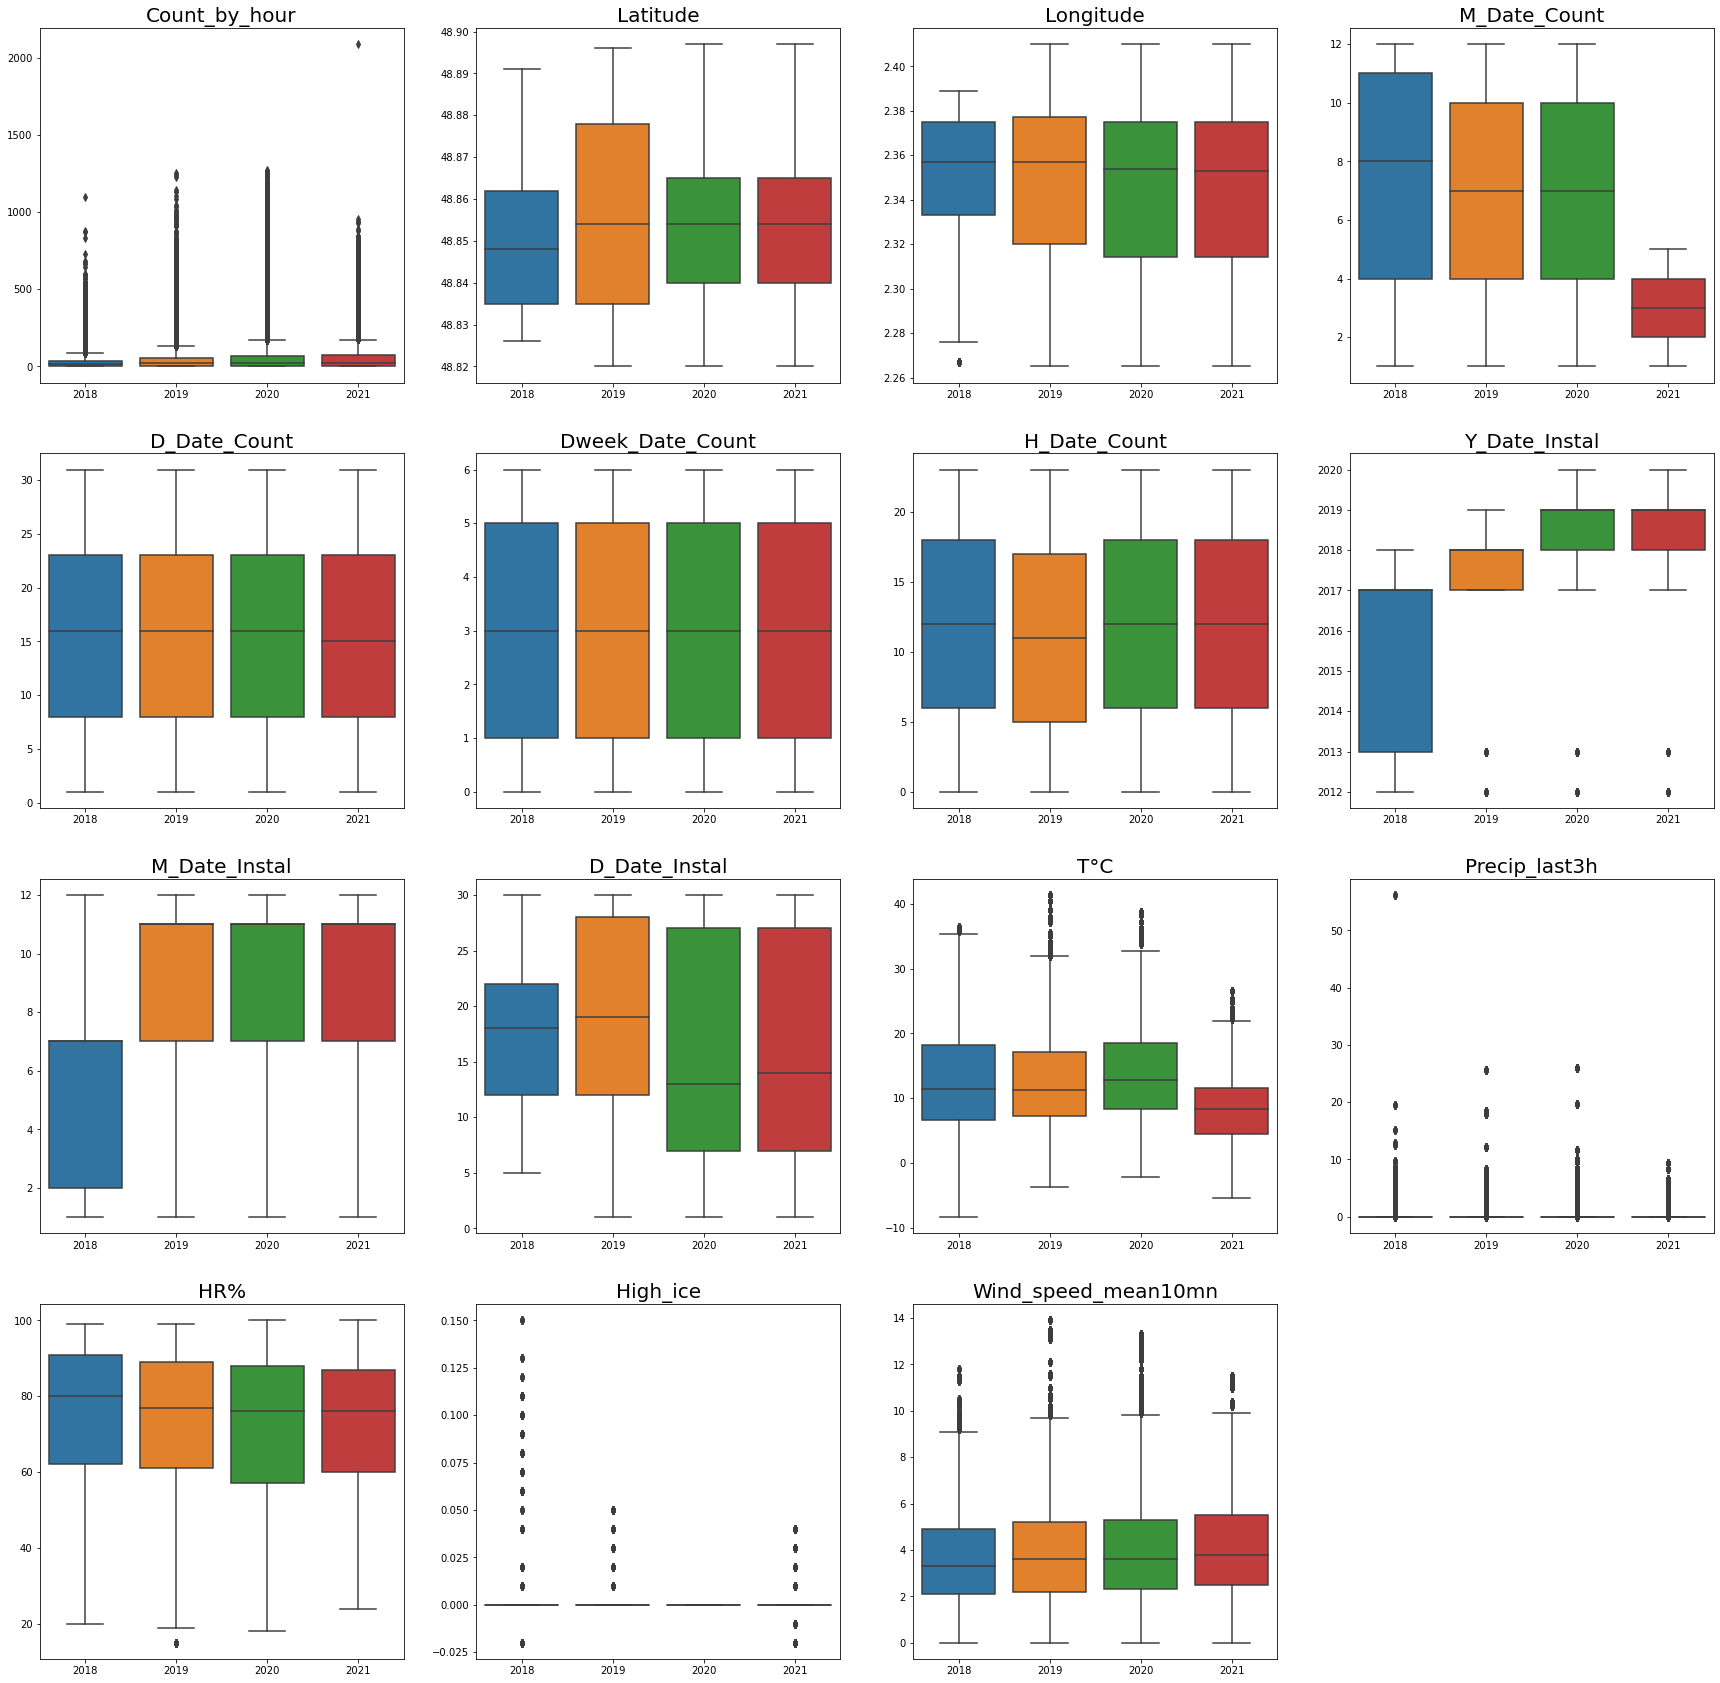

In [25]:
# Boxplot pour visualiser la distribution pour chaque colonne:
Liste_col = ['Count_by_hour', 'Latitude', 'Longitude',
             'M_Date_Count', 'D_Date_Count', 'Dweek_Date_Count', 'H_Date_Count',
             'Y_Date_Instal', 'M_Date_Instal', 'D_Date_Instal',
             'T°C', 'Precip_last3h', 'HR%', 'High_ice','Wind_speed_mean10mn']

df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')

fig = plt.figure(figsize = (30,30))
for i, j in enumerate(Liste_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = df, y = j, x = 'Y_Date_Count')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(j, size = 20)

**Observations**:
- Count_by_hour: valeur aberrante > 2000
- M_Date_Count: pour 2021 est plus bas mais c'est normal n'ayant que jusqu'à mai
- Y_Date_Instal: beaucoup de nouveaux compteurs sont installés chaque année, les compteurs avant 2017 ont tous été supprimé sauf ceux de 2012 et 2013, à vérifier la fiabilité de ces compteurs étant vieux
- Precip_last3h: Valeur aberrante > 50
- Pour les 3 colonnes (High_ice, Precip_last3h, Count_by_hour) la majorité des valeurs sont à 0, il est préférable de faire un boxplot sur les valeurs différentes de 0 pour plus de précision et vérifier qu'il n'y a pas de valeurs négatives

### III.2 Traitement des valeurs aberrantes

In [26]:
# Supression des valeurs aberrantes dans comtage horaire:
df = df[df['Count_by_hour'] < 2000]

nombre de données High_ice <0: 3060
nombre de données Precip_last3h <0: 54745
nombre de données Count_by_hour <0: 0


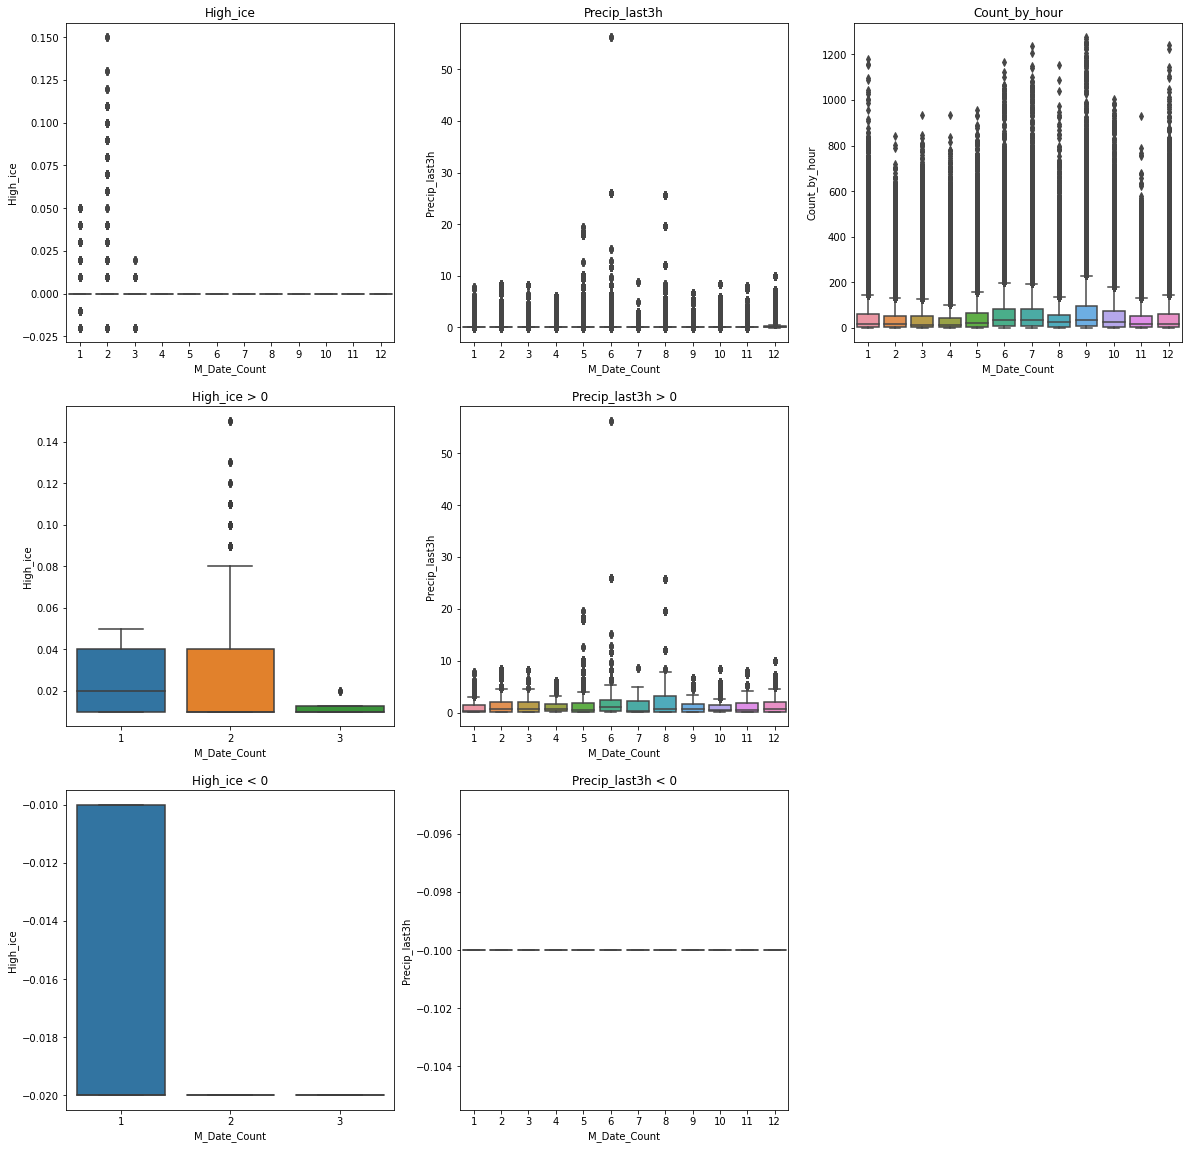

In [27]:
# Observations des boxplots des 3 colonnes (High_ice, Precip_last3h, Count_by_hour)
fig = plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice')
print('nombre de données High_ice <0:', len(df[df['High_ice'] < 0]))
plt.subplot(3,3,4)
df1 = df[df['High_ice'] > 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice > 0')
plt.subplot(3,3,7)
df1 = df[df['High_ice'] < 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice < 0')

plt.subplot(3,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h')
print('nombre de données Precip_last3h <0:', len(df[df['Precip_last3h'] < 0]))
plt.subplot(3,3,5)
df2 = df[df['Precip_last3h'] > 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h > 0')
plt.subplot(3,3,8)
df2 = df[df['Precip_last3h'] < 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h < 0')

plt.subplot(3,3,3)
sns.boxplot(data = df, y = 'Count_by_hour', x = 'M_Date_Count');
plt.title('Count_by_hour')
print('nombre de données Count_by_hour <0:', len(df[df['Count_by_hour'] < 0]))

**Observations:**
- High_ice: Il neige que de janvier à mars, les valeurs négatives sont des erreurs, pas facile de savoir si c'est à remplacer par 0 ou par la valeur abs ?
- Precip_last3h: Il pleut toute l'année, les valeurs négatives à -0.1 sont des erreurs (à remplacer par 0 ou par valeur abs ?)

**Hypothèse : Je fais le choix de remplacer les valeurs négatives par leur absolues**

Id  Count_by_hour        Date Date_instal Source Direction  \
0  1.1            1.0  2018-01-01  2017-12-15   2018     NE-SO   
1  1.1            3.0  2018-01-01  2017-12-15   2018     NE-SO   
2  1.1            1.0  2018-01-01  2017-12-15   2018     NE-SO   
3  1.1            2.0  2018-01-01  2017-12-15   2018     NE-SO   
4  1.1            0.0  2018-01-01  2017-12-15   2018     NE-SO   

                 Address  Latitude  Longitude             Coord  ...  \
0  VOIE GEORGES POMPIDOU    48.848      2.276  48.84800,2.27600  ...   
1  VOIE GEORGES POMPIDOU    48.848      2.276  48.84800,2.27600  ...   
2  VOIE GEORGES POMPIDOU    48.848      2.276  48.84800,2.27600  ...   
3  VOIE GEORGES POMPIDOU    48.848      2.276  48.84800,2.27600  ...   
4  VOIE GEORGES POMPIDOU    48.848      2.276  48.84800,2.27600  ...   

   Y_Date_Instal  M_Date_Instal  D_Date_Instal  T°C  Precip_last3h   HR%  \
0           2017             12             15  NaN            NaN   NaN   
1           2017             12             15  8.4            0.0  72.0   
2           2017             12             15  NaN            NaN   NaN   
3           2017             12             15  NaN            NaN   NaN   
4           2017             12             15  7.8            0.0  69.0   

   High_ice  Wind_speed_mean10mn  City_meteo            Datetime  
0       NaN                  NaN         NaN 2018-01-01 00:00:00  
1       0.0                  7.0  Athis-Mons 2018-01-01 01:00:00  
2       NaN                  NaN         NaN 2018-01-01 02:00:00  
3       NaN                  NaN         NaN 2018-01-01 03:00:00  
4       0.0                  6.8  Athis-Mons 2018-01-01 04:00:00  

[5 rows x 25 columns]

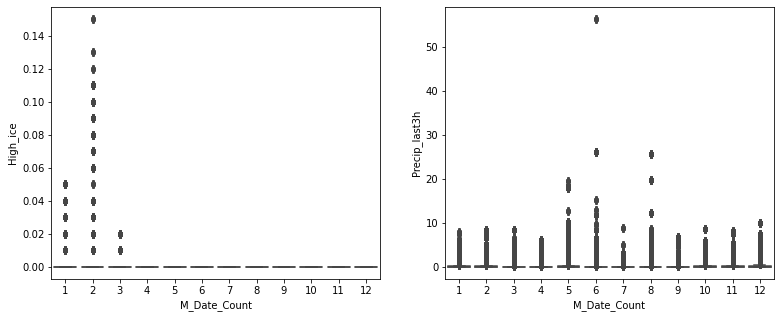

In [28]:
# Remplacement des valeurs négatives par positives:
df['High_ice'] = abs(df['High_ice'])
df['Precip_last3h'] = abs(df['Precip_last3h'])

# Affichage des boxplot:
fig = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')

# Affichage du df:
df = df.sort_values(by = ['Id', 'Datetime'])
df.index = range(len(df.index))
df.head()

# IV. Supression des NANs + Ajout de colonnes (j fériés, vac, confinement)

### IV.1 Chargement des jours fériés

In [29]:
# Chargement du dataset. Source : https://www.data.gouv.fr/fr/datasets/jours-feries-en-france/
df_jour_ferie = pd.read_csv('jours_feries_metropole.csv')

# filtrage du dataset sur les années
df_jour_ferie = df_jour_ferie[(df_jour_ferie.annee > 2017)]
df_jour_ferie = df_jour_ferie[(df_jour_ferie.annee < 2022)]

# suppression de la variable "zone" et annee
df_jour_ferie = df_jour_ferie.drop(columns=['zone'])
df_jour_ferie = df_jour_ferie.drop(columns=['annee'])

# passage en datetime
df_jour_ferie['date'] = pd.to_datetime(df_jour_ferie['date'])

# reset de l'index
df_jour_ferie = df_jour_ferie.reset_index(drop=True)

# rename
df_jour_ferie = df_jour_ferie.rename(columns={"date": "Date"})

### IV.2 Chargement des vacances scolaires

In [30]:
# Chargement du dataset. Source : https://www.data.gouv.fr/fr/datasets/vacances-scolaires-par-zones/

# Depuis janvier 2016 :
# Zone A : Académies de Besançon, Bordeaux, Clermont-Ferrand, Dijon, Grenoble, Limoges, Lyon, Poitiers
# Zone B : Académies d'Aix-Marseille, Amiens, Caen, Lille, Nantes, Nice, Nancy-Metz, Orléans-Tours, Reims, Rennes, Rouen, Strasbourg
# Zone C : Académies de Créteil, Montpellier, Paris, Versailles, Toulouse

df_vac_scolaire = pd.read_csv('data_vacances_scolaires.csv')

# passage en datetime et selection des dates
df_vac_scolaire['date'] = pd.to_datetime(df_vac_scolaire['date'])
mask = (df_vac_scolaire['date'] >= '2018-01-01') & (df_vac_scolaire['date'] <= '2021-12-31')
df_vac_scolaire = df_vac_scolaire.loc[mask]

# suppression de la variable "zone"
df_vac_scolaire = df_vac_scolaire.drop(columns=['vacances_zone_a', 'vacances_zone_b'])

# reset de l'index
df_vac_scolaire = df_vac_scolaire.reset_index(drop=True)

# rename
df_vac_scolaire = df_vac_scolaire.rename(columns={"date": "Date"})

### IV.3 Chargement des confinements

In [31]:
# chargement du dataset des dates de confinements. Source : Tarik
df_confinement = pd.read_csv('Date_confinement.csv')

### IV.4 Fusion des df et suppressions des NANs

In [32]:
print('''dimension de l'ancien df''', df.shape)

df_jour_ferie['Date'] = df_jour_ferie['Date'].astype('string')
df_vac_scolaire['Date'] = df_vac_scolaire['Date'].astype('string')

# Merge des jours fériés au df
df = df.merge(right = df_jour_ferie, on='Date', how='left')
# Merge des vacances au df
df = df.merge(right = df_vac_scolaire, on='Date', how='left')
# Merge des confinnements au df
df = df.merge(right = df_confinement, on='Date', how='left')

print('''dimension du nouveau df''', df.shape)

dimension de l'ancien df (1723878, 25)
dimension du nouveau df (1723878, 29)


In [33]:
# Supression des NANs
df['Confinement_id'] = df['Confinement_id'].fillna(value='None')
df['nom_jour_ferie'] = df['nom_jour_ferie'].fillna(value='None')
df['nom_vacances'] = df['nom_vacances'].fillna(value='None')
df = df.fillna(method="ffill")
df = df.fillna(method="bfill")
print(df.isna().sum())

Id                     0
Count_by_hour          0
Date                   0
Date_instal            0
Source                 0
Direction              0
Address                0
Latitude               0
Longitude              0
Coord                  0
Y_Date_Count           0
M_Date_Count           0
D_Date_Count           0
Dweek_Date_Count       0
H_Date_Count           0
Y_Date_Instal          0
M_Date_Instal          0
D_Date_Instal          0
T°C                    0
Precip_last3h          0
HR%                    0
High_ice               0
Wind_speed_mean10mn    0
City_meteo             0
Datetime               0
nom_jour_ferie         0
vacances_zone_c        0
nom_vacances           0
Confinement_id         0
dtype: int64


### IV.5 Enregistrement final du df_hour

In [34]:
# Unification manuel des adresses pour supprimer les doublons restants. Source : Céline
    ### Passage par excel en utilisant la formule (df = df_hour.groupby(['Id','Address']).mean())
df2 = pd.read_csv('Adress_by_Id.csv', index_col=0)
df = df.drop(['Address'], axis = 1) # l'ancienne adresse est supprimée
df= df.merge(df2, on = 'Id', how = 'left') # la nouvelle adresse est ajoutée

# Création d'une col Adresse_Dir comprenant les coord
df['Address_Dir'] = df['Address'] + ' ' + df['Direction'] # la col adresse avec direction est créée

In [35]:
# Enregister et afficher le nouveau df_meteo
df_hour = df
df_hour.head()

Id  Count_by_hour        Date Date_instal Source Direction  Latitude  \
0  1.1            1.0  2018-01-01  2017-12-15   2018     NE-SO    48.848   
1  1.1            3.0  2018-01-01  2017-12-15   2018     NE-SO    48.848   
2  1.1            1.0  2018-01-01  2017-12-15   2018     NE-SO    48.848   
3  1.1            2.0  2018-01-01  2017-12-15   2018     NE-SO    48.848   
4  1.1            0.0  2018-01-01  2017-12-15   2018     NE-SO    48.848   

   Longitude             Coord  Y_Date_Count  ...  High_ice  \
0      2.276  48.84800,2.27600          2018  ...       0.0   
1      2.276  48.84800,2.27600          2018  ...       0.0   
2      2.276  48.84800,2.27600          2018  ...       0.0   
3      2.276  48.84800,2.27600          2018  ...       0.0   
4      2.276  48.84800,2.27600          2018  ...       0.0   

   Wind_speed_mean10mn  City_meteo            Datetime  nom_jour_ferie  \
0                  7.0  Athis-Mons 2018-01-01 00:00:00     1er janvier   
1                  7.0  Athis-Mons 2018-01-01 01:00:00     1er janvier   
2                  7.0  Athis-Mons 2018-01-01 02:00:00     1er janvier   
3                  7.0  Athis-Mons 2018-01-01 03:00:00     1er janvier   
4                  6.8  Athis-Mons 2018-01-01 04:00:00     1er janvier   

   vacances_zone_c      nom_vacances  Confinement_id                Address  \
0             True  Vacances de Noël            None  VOIE GEORGES POMPIDOU   
1             True  Vacances de Noël            None  VOIE GEORGES POMPIDOU   
2             True  Vacances de Noël            None  VOIE GEORGES POMPIDOU   
3             True  Vacances de Noël            None  VOIE GEORGES POMPIDOU   
4             True  Vacances de Noël            None  VOIE GEORGES POMPIDOU   

                   Address_Dir  
0  VOIE GEORGES POMPIDOU NE-SO  
1  VOIE GEORGES POMPIDOU NE-SO  
2  VOIE GEORGES POMPIDOU NE-SO  
3  VOIE GEORGES POMPIDOU NE-SO  
4  VOIE GEORGES POMPIDOU NE-SO  

[5 rows x 30 columns]

# V. Création d'un df_day et test de corrélation sur les 2 dfs

In [36]:
# Création d'un df_day pour faire un comptage moyen horaire par jour (au lieu de par heure pour df)

col_sum = ['Precip_last3h']
col_mean = ['Count_by_hour', 'T°C', 'HR%', 'High_ice', 'Wind_speed_mean10mn']
col = ['Id', 'Date','M_Date_Instal','nom_jour_ferie',
       'Source', 'Direction', 'Latitude', 'Longitude','Coord',
       'Y_Date_Count','M_Date_Count', 'D_Date_Count', 'Dweek_Date_Count', 
       'vacances_zone_c', 'nom_vacances', 'Confinement_id','Y_Date_Instal']
        #'City_meteo','Address','Date_instal','D_Date_Instal','H_Date_Count','Datetime' 
        # ne sont pas ajoutées sinon len(df2) est plus long ce qui n'est pas normal
dic = {}
for i in col_sum:
    dic[i] = 'sum'
for j in col_mean:
    dic[j] = 'mean'

df_day = df.groupby(col).agg(dic).reset_index()

print('df_hour:', len(df_hour))
print('df_day:', len(df_day))
print('df_hour/24h:', len(df_hour)/24)
df_day.head()

df_hour: 1723878
df_day: 70162
df_hour/24h: 71828.25


Id        Date  M_Date_Instal nom_jour_ferie Source Direction  Latitude  \
0  1.1  2018-01-01             12    1er janvier   2018     NE-SO    48.848   
1  1.1  2018-01-02             12           None   2018     NE-SO    48.848   
2  1.1  2018-01-03             12           None   2018     NE-SO    48.848   
3  1.1  2018-01-04             12           None   2018     NE-SO    48.848   
4  1.1  2018-01-05             12           None   2018     NE-SO    48.848   

   Longitude             Coord  Y_Date_Count  ...  vacances_zone_c  \
0      2.276  48.84800,2.27600          2018  ...             True   
1      2.276  48.84800,2.27600          2018  ...             True   
2      2.276  48.84800,2.27600          2018  ...             True   
3      2.276  48.84800,2.27600          2018  ...             True   
4      2.276  48.84800,2.27600          2018  ...             True   

       nom_vacances  Confinement_id  Y_Date_Instal Precip_last3h  \
0  Vacances de Noël            None           2017          30.8   
1  Vacances de Noël            None           2017           4.2   
2  Vacances de Noël            None           2017          23.7   
3  Vacances de Noël            None           2017          30.1   
4  Vacances de Noël            None           2017          17.1   

  Count_by_hour        T°C        HR%  High_ice  Wind_speed_mean10mn  
0      1.416667   7.595833  79.583333       0.0             7.129167  
1      5.041667   7.429167  85.916667       0.0             4.354167  
2      3.666667  10.166667  75.458333       0.0             8.845833  
3      3.333333  11.054167  87.875000       0.0             5.858333  
4      5.916667   9.037500  84.375000       0.0             4.329167  

[5 rows x 23 columns]

In [37]:
# Test de correlation de df_hour sur les valeurs num et affichage des résultats sur la variable cible "Count_by_hour"
df2 = df_hour.corr()
df2['ABS'] = abs(df2['Count_by_hour'])
df2 = df2[['Count_by_hour', 'ABS']]
df2.sort_values(by = 'ABS', ascending = False)

Count_by_hour       ABS
Count_by_hour             1.000000  1.000000
H_Date_Count              0.250165  0.250165
T°C                       0.170140  0.170140
HR%                      -0.169843  0.169843
Latitude                  0.103027  0.103027
Y_Date_Count              0.088356  0.088356
Y_Date_Instal             0.080911  0.080911
Dweek_Date_Count         -0.080754  0.080754
Id                        0.075557  0.075557
Wind_speed_mean10mn       0.070894  0.070894
Longitude                 0.063414  0.063414
vacances_zone_c          -0.049773  0.049773
M_Date_Count              0.048310  0.048310
M_Date_Instal            -0.039447  0.039447
D_Date_Instal             0.037767  0.037767
Precip_last3h            -0.032781  0.032781
High_ice                 -0.030627  0.030627
D_Date_Count              0.003085  0.003085

In [38]:
# Test de correlation de df_day sur les valeurs num et affichage des résultats sur la variable cible "Count_by_hour"
df2 = df_day.corr()
df2['ABS'] = abs(df2['Count_by_hour'])
df2 = df2[['Count_by_hour', 'ABS']]
df2.sort_values(by = 'ABS', ascending = False)

Count_by_hour       ABS
Count_by_hour             1.000000  1.000000
Latitude                  0.167807  0.167807
T°C                       0.146336  0.146336
Y_Date_Count              0.144879  0.144879
Dweek_Date_Count         -0.131153  0.131153
Longitude                 0.126686  0.126686
Id                        0.120221  0.120221
Y_Date_Instal             0.118720  0.118720
HR%                      -0.098773  0.098773
M_Date_Instal            -0.088084  0.088084
Precip_last3h            -0.087746  0.087746
vacances_zone_c          -0.084320  0.084320
M_Date_Count              0.076578  0.076578
High_ice                 -0.054860  0.054860
Wind_speed_mean10mn      -0.038535  0.038535
D_Date_Count              0.002136  0.002136

**Observations:**
- Il est surprenant de voir que les p-values sont toutes basse <25% alors que l'on sait que beaucoup de paramètres comme le mois de comptage, la hauteur de neige... sont fortement corrélés à la fréquentation des vélos.

In [39]:
# Enregister les nouveau df sous format csv
df_hour.to_csv('2018-2021_donnees-velib-meteo_hour.csv')
df_day.to_csv('2018-2021_donnees-velib-meteo_day.csv')